In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections

#### Feature Details :
    SNo - Serial number.
    Date - Date of funding in format DD/MM/YYYY.
    StartupName - Name of the startup which got funded.
    IndustryVertical - Industry to which the startup belongs.
    SubVertical - Sub-category of the industry type.
    CityLocation - City which the startup is based out of.
    InvestorsName - Name of the investors involved in the funding round.
    InvestmentType - Either Private Equity or Seed Funding.
    AmountInUSD - Funding Amount in USD.
    Remarks - Other information, if any.
    Insights -
    Find out what type of startups are getting funded in the last few years?
    Who are the important investors?
    What are the hot fields that get a lot of funding these days?

In [2]:
with open("./startup_funding.csv", "r", encoding="utf8") as file_object:
    csv_data = csv.DictReader(file_object, skipinitialspace = True)
    csv_data = list(csv_data)

column_name = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "CityLocation", "InvestorsName",
               "InvestmentType", "AmountInUSD", "Remarks"]

df_data = pd.read_csv("./startup_funding.csv")
# df_data.columns = column_name
# df_data.head()
# df_data.to_csv("./startup_funding_updated.csv", index=False)
df_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
csv_data[0]

{'SNo': '0',
 'Date': '01/08/2017',
 'StartupName': 'TouchKin',
 'IndustryVertical': 'Technology',
 'SubVertical': 'Predictive Care Platform',
 'CityLocation': 'Bangalore',
 'InvestorsName': 'Kae Capital',
 'InvestmentType': 'Private Equity',
 'AmountInUSD': '1,300,000',
 'Remarks': ''}

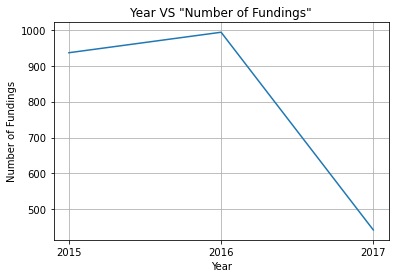

2015 936
2016 993
2017 443


In [4]:
"""
Problem Statement :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
Print year-wise total number of fundings also. Print years in ascending order.
Note :
There is some error in the 'Date' feature. Make sure to handle that.
Output Format :
year1 TotalFunding1
year2 TotalFunding2
. . . 
"""
data = {}
for row in csv_data:
    m = row["Date"]
    
    m = m.replace(".", "/")
    if "//" in m:
        m = m.replace("/", "")
        
    if len(m.split("/")[-1]) != 4:
        m = "2" + m.split("/")[-1]
    
    row["Date"] = row["Date"].replace(".", "/") 
    
    year = m[-4:]
    if year in data:
        data[year] += 1
    else:
        data[year] = 1
        
ord_dct = collections.OrderedDict(sorted(data.items()))                                  
plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.title('Year VS "Number of Fundings"')
plt.grid()
plt.show()

for i in ord_dct.keys():
    print(i,end=" ")
    print(ord_dct[i])

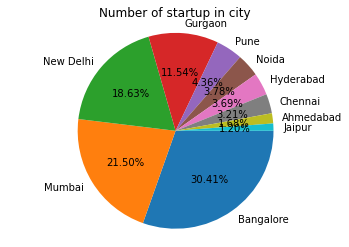

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [5]:
"""
Problem Statement :
Find out which cities are generally chosen for starting a startup.
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.
Print the city name and number of startups in that city also.
Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.
Output Format :
city1 number1
city2 number2
. . . 
"""

df = df_data
#df['CityLocation'].dropna(inplace=True)
df.dropna(subset=["CityLocation"],inplace=True)
#df.tail()
def separateCity(city): 
    return city.split('/')[0].strip() 
df['CityLocation']=df['CityLocation'].apply(separateCity) 
df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'

city = df['CityLocation']
city = city.value_counts()[:10]
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()

for i in range(city_name.shape[0]):
    print(city_name[i],no_of_str[i])

In [6]:
print(df_data["AmountInUSD"].value_counts().keys().tolist())

['1,000,000', '500,000', '2,000,000', '100,000', '3,000,000', '5,000,000', '10,000,000', '150,000', '200,000', '15,000,000', '250,000', '6,000,000', '300,000', '4,000,000', '1,500,000', '600,000', '400,000', '1,200,000', '450,000', '20,000,000', '350,000', '2,500,000', '25,000,000', '30,000,000', '50,000,000', '100,000,000', '750,000', '650,000', '3,500,000', '7,000,000', '8,000,000', '50,000', '700,000', '12,000,000', '4,500,000', '7,500,000', '16,000,000', '40,000', '35,000,000', '40,000,000', '2,200,000', '11,000,000', '900,000', '1,100,000', '160,000', '1,400,000', '60,000,000', '147,000', '375,000', '180,000', '1,800,000', '1,300,000', '1,600,000', 'New Delhi', '2,400,000', '9,000,000', '5,500,000', '22,500', '550,000', '800,000', '13,500,000', '1,350,000', '30,000', '21,000,000', '18,000,000', '310,000', '3,100,000', '6,500,000', '55,000,000', '5,300,000', '440,000', '75,000,000', '2,300,000', '12,500,000', '2,250,000', '1,700,000', '77,000', '7,700,000', '1,250,000', '120,000', 

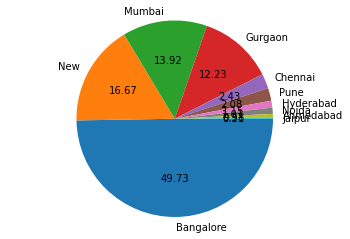

Bangalore 49.73%
New 16.67%
Mumbai 13.92%
Gurgaon 12.23%
Chennai 2.43%
Pune 2.08%
Hyderabad 1.15%
Noida 1.01%
Ahmedabad 0.58%
Jaipur 0.21%


In [7]:
"""
Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.
Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 
. . .
. . .
"""
data = dict()
for row in csv_data:
    key = (row["CityLocation"].split(" ")[0].strip())
    value = row["AmountInUSD"].strip()
    value = value.replace("\\\\xc2\\\\xa02", "")
    value = value.replace("\\\\xc2\\\\xa0", "")
    value = value.replace('N/A', "")
    if value == "undisclosed" or value == 'unknown' or value == 'Undisclosed' or value == '14,342,000+' or value == "":
        value = "0.0"
    value = float(value.replace(",", ""))
    if key != "":
        if key == "Delhi":
            key = 'New Delhi'
        elif key == "bangalore":
            key = "Bangalore"
        if key in data:
            data[key] += value
        else:
            data[key] = value
        
data = sorted(data.items(), key = lambda x: x[1], reverse=True)[0:10]
data = dict(data)
plt.pie(list(data.values()), labels= list(data.keys()), autopct="%.2f", counterclock=False)
plt.axis("equal")
plt.show()

total_sum = sum(data.values())
for key, val in data.items():
    print(key, "{:.2f}%".format(val/total_sum * 100))

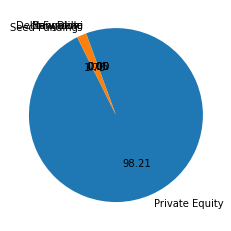

Private Equity 98.21
Seed Funding 1.75
Debt Funding 0.05
Bangalore 0.00
New Delhi 0.00


In [15]:
"""
Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", 
and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 
"""

df=df_data
df["AmountInUSD"] = df["AmountInUSD"].replace("Bangalore", "0.0")
df["AmountInUSD"] = df["AmountInUSD"].replace("New Delhi", "0.0")
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))



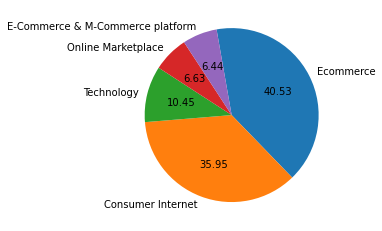

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [17]:
"""
Problem Statement :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.
Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . . 
"""
df = df_data
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('IndustryVertical')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

In [18]:
"""
Problem Statement :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, 
ignore correcting all, just handle important ones.
Output Format :
startup1
startup2
startup3
. . . 
"""

df = df_data
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index
for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [19]:
"""
Problem Statement :
Find the top 5 startups who received the most number of funding rounds. That means, 
startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are 
many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2
startup3 number3
. . . 
"""
df = df_data
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Medinfi 5
Jugnoo 5


In [26]:
"""
Problem 8 : Top Investor
Problem Statement :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
Note:
In startup, multiple investors might have invested. So consider each investor for that startup. 
Ignore the undisclosed investors.
"""

df.InvestorsName.fillna("",inplace = True)
investors = df.InvestorsName

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1

ans = sorted(dct.items(), key = lambda x:x[1], reverse = True)[0]
print(ans)

('Sequoia Capital', 54)
